# Projet "Capitals Learning"
## Classification d'images de capitales du monde

Groupe : Paul ANACLET, Nicolas CORMARY, Sylvain CROUZET, Théo DESPRATS

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from models.basic_model_1 import basic_model_1
from models.vgg16_model import vgg16_model
from features.load_data import load_data
from features.get_classes import get_classes
from data.dispatch_data import dispatch_data
from visualization.plot_classes_repartition import plot_classes_repartition
from visualization.plot_training_analysis import plot_training_analysis
from visualization.visualize_random_images import visualize_random_images

2022-04-20 11:38:42.390379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tcd32/programmation/deepLearning/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-20 11:38:42.390424: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Meta-paramètres

In [2]:
EPOCHS = 20
BATCH_SIZE = 10
LEARNING_RATE = 3e-4

## Chargement des données

### Répartition des images

In [4]:
# Répartition des images dans les différents datasets
pourcentageTrain = 70
pourcentageTest = 15
pourcentageValidation = 15

dispatch_data(pourcentageTrain, pourcentageTest, pourcentageValidation)


Images successfully dispatched.


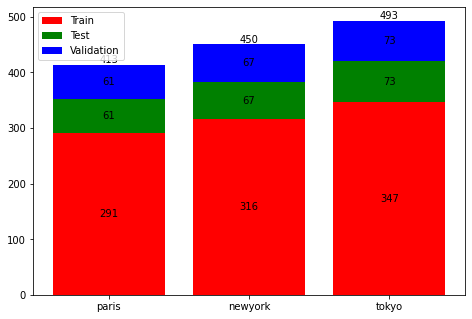

In [3]:
plot_classes_repartition()

### Chargement des images

In [3]:
CLASSES = get_classes()
IMAGE_SIZE = 64

x_train, y_train = load_data(dataset='train', image_size=IMAGE_SIZE)
x_val, y_val = load_data(dataset='validation', image_size=IMAGE_SIZE)
x_test, y_test = load_data(dataset='test', image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

### Visualisation des images

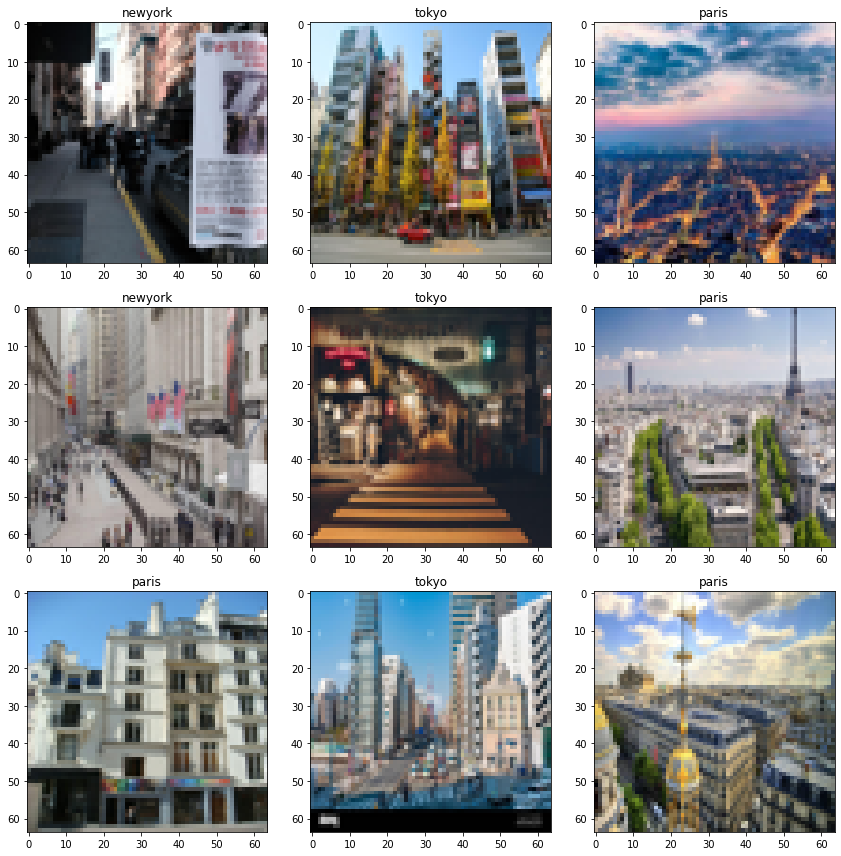

In [4]:
%matplotlib inline

visualize_random_images(x_train, y_train, CLASSES)

### Augmentation

In [5]:
train_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

/home/tcd32/programmation/deepLearning/venv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


(10, 64, 64, 3)


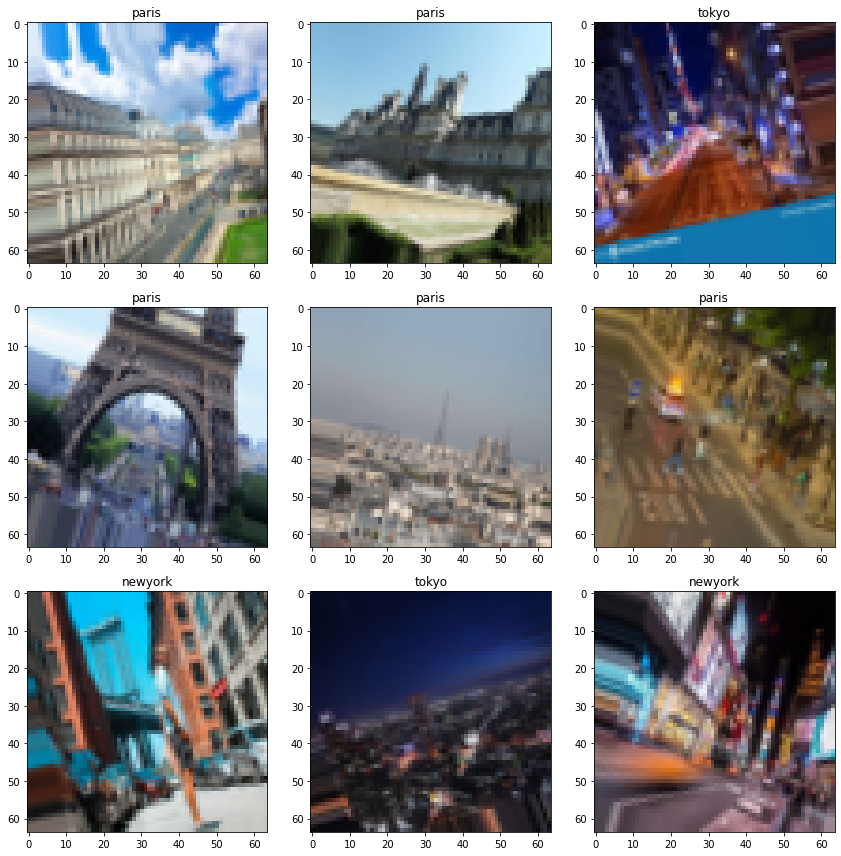

In [4]:
%matplotlib inline

generated = train_augmentation.flow(x_train, y_train, batch_size=BATCH_SIZE)
img, label = generated.next()

visualize_random_images(img, label, CLASSES)

## Modèles

### Basic Model 1

[Code source](models/basic_model_1.py)

In [8]:
# Creation du modele
model = basic_model_1(CLASSES, IMAGE_SIZE)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 96)        

In [ ]:
# Entrainement du modele
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])

history_bm1 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

In [ ]:
# Analyse des résultats
plot_training_analysis(history_bm1)

### VGG-16

In [ ]:
# Creation du modele
model = vgg16_model(IMAGE_SIZE)

model.summary()

## Analyse

### TODO: Courbes avec toutes les accuracy des modèles